## Examples

In [2]:
a = 1 + 3


3

In [3]:
println(a)

3


## Multiple Dispatch

- Different implementations or *methods* of a function are called based on the types of the argument
- How does this compare to c++?
- In c++ static multiple dispatch (i.e. based on the compile time type of objects) has existed for a long time (function overloading)
- In c++ dynamic dispatch happens only based on the object type, not on the other arguments (single dispatch, virtual table lookup, runtime polymorphism)

In [4]:
roundness(x) = 4π * area(x) / circum(x)^2

roundness (generic function with 1 method)

In [7]:
struct Circle
    radius
end

struct Square
    side
end

area(x::Circle) = (π * x.radius^2)
area(x::Square) = x.side^2
circum(x::Circle) = 2π * x.radius
circum(x::Square) = 4*x.side


circum (generic function with 2 methods)

In [8]:
circle = Circle(1.0)
square = Square(2.0)

println(roundness(circle))
println(roundness(square))

1.0
0.7853981633974483


In [9]:
overlap(x::Circle, y::Circle) = println("Very easy")
overlap(x::Square, y::Square) = println("Bit more complicated")
overlap(x::Circle, y::Square) = println("Headache time")
overlap(y::Square, x::Circle) = overlap(x, y)

overlap(square, circle)

Headache time


## Other features (or lack thereof)

- In principle all variables are references
- Dynamic language: type is a property of objects, not of variables
- In many cases the compiler can figure out a variable has a fixed type and will optimize accordingly
- Inheritance only serves to steer dispatch, not to copy over data layout
- Good support for distributed memory parallelism, multithreading from 1.3.0
- Linear algebra happens in BLAS, MKL can be used if desired
- No strictly enforced access control
- No strictly enforced constness
- No direct control over memory management (garbage collector)
- Meta-programming through runtime code eval, macros, and generated functions

## Broadcasting

- generalisation of Matlab `.*` and `bsxfun` mechanism
- works for all functions, also user defined ones

In [10]:
q(x) = (v = x*x; println(v); v)
A = collect(1:10)
q.(A);

1
4
9
16
25
36
49
64
81
100


## Plotting

- Various plotting libraries exist
- They typically take a long time to load
- This can be traced back to the JIT compilation

In [11]:
using Plots

 11.012850 seconds (30.82 M allocations: 1.521 GiB, 7.41% gc time)
  0.000703 seconds (2.11 k allocations: 160.531 KiB)


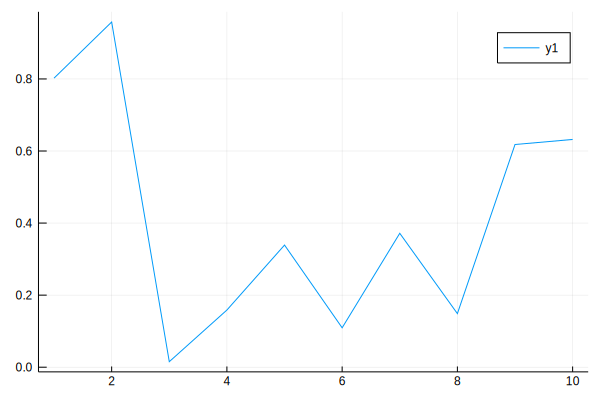

In [12]:
@time plot(rand(10))
@time plot(rand(10))

## Standard Library

Extensive, but no *batteries included* philosophy. Includes:

- printing
- network and file IO
- parallel computing and co-routines
- package management
- testing
- linear algebra

In [13]:
using LinearAlgebra
names(LinearAlgebra)

123-element Array{Symbol,1}:
 :/               
 :ARPACKException 
 :Adjoint         
 :BLAS            
 :Bidiagonal      
 :BunchKaufman    
 :Cholesky        
 :CholeskyPivoted 
 :Diagonal        
 :Eigen           
 :Factorization   
 :GeneralizedEigen
 :GeneralizedSVD  
 ⋮                
 :svdvals         
 :svdvals!        
 :sylvester       
 :tr              
 :transpose       
 :transpose!      
 :tril            
 :tril!           
 :triu            
 :triu!           
 :×               
 :⋅               

In [14]:
n = 20
A = zeros(n,n)
for i in 1 : n A[i,i] = -2 end
for i in 1 : n-1 A[i,i+1] = A[i+1,i] = 1 end

In [15]:
λ = eigvals(A)
@show - π^2 / (n+1)^2
@show maximum(λ)

-(π ^ 2) / (n + 1) ^ 2 = -0.022380055331268387
maximum(λ) = -0.022338347549743037


-0.022338347549743037

In [16]:
b = ones(n) * (1/(n+1))^2;

In [17]:
u = A \ b;

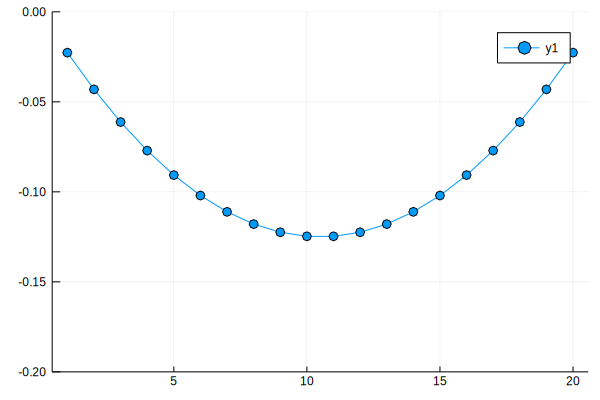

In [18]:
plot(u, marker=:o, ylims=(-0.2,0))

In addition to being a dynamically typed, fast programming language, Julia comes with:

- package management
- Github integration
- testing infrastructure

With minor effort, relying on semi-standard packages, you get:

- continuous integration
- documentation generation and deployment

## Third party packages

In [19]:
using Pkg
pkg"add IterativeSolvers"

  Updating registry at `C:\Users\Kristof\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %Fetching: [===>                                     ]  7.4 %Fetching: [======>                                  ]  14.4 % [============>                            ]  27.6 %===============>                         ]  36.2 %Fetching: [===================>                     ]  45.1 % [======================>                  ]  54.9 %>              ]  64.2 %Fetching: [============================>            ]  69.6 %Fetching: [===============================>         ]  75.9 %       ]  82.1 %=======================================> ]  97.3 % Resolving package versions...
  Updating `C:\Users\Kristof\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\Kristof\.julia\environments\v1.2\Manifest.toml`
 [no changes]


norm(u - u1) = 1.8891767858494865e-16


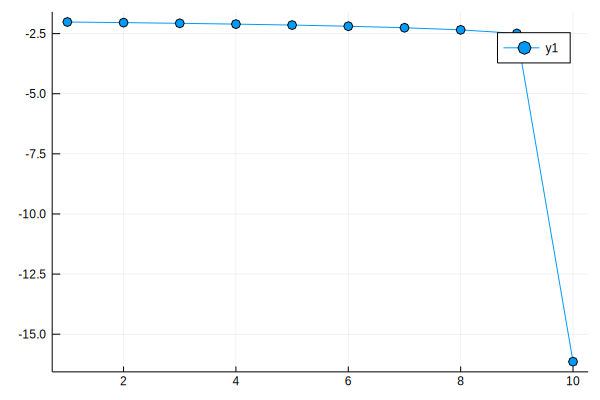

In [20]:
using IterativeSolvers
u1, hist = gmres(A,b,log=true)
@show norm(u - u1)
plot(log10.(hist.data[:resnorm]), marker=:o)

## Automatic Differentiation

In [21]:
pkg"add DualNumbers"

 Resolving package versions...
  Updating `C:\Users\Kristof\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\Kristof\.julia\environments\v1.2\Manifest.toml`
 [no changes]


In [22]:
using DualNumbers
cubic(x) = x^3
@show cubic(2.0)

cubic(2.0) = 8.0


8.0

In [23]:
ϵ = Dual(0,1)
@show realpart(cubic(2 + ϵ))
@show dualpart(cubic(2 + ϵ))

realpart(cubic(2 + ϵ)) = 8
dualpart(cubic(2 + ϵ)) = 12


12

## Example: Linked List

We want our own linked list implementation.

In [24]:
struct Node{T}
    data::T
    next::Int
end

struct LinkedList{T}
    nodes::Vector{Node{T}}
    head::Int
end

In [25]:
function LinkedList(els::Vector)
    nodes = [Node(el,i+1) for (i,el) in enumerate(els)]
    nodes[end] = Node(last(els),0)
    LinkedList(nodes,1)
end

start(ll::LinkedList) = (0, ll.head)
done(ll::LinkedList, state) = state[2] < 1
next(ll::LinkedList, (prev, next)) = ll.nodes[next].data, (next, ll.nodes[next].next)

function Base.iterate(ll::LinkedList, state=start(ll))
    done(ll, state) ? nothing : next(ll, state)
end

# export start, next, done

In [26]:
ll = LinkedList(["apple", "pear", "banana"])

state = start(ll)
while !done(ll,state)
    item, newstate = next(ll, state)
    println(item)
    state = newstate
end

apple
pear
banana


In [27]:
function Base.insert!(ll::LinkedList, pos, item)
    prev, next = pos
    push!(ll.nodes, Node(item, next))
    prev > 0 && (ll.nodes[prev] = Node(ll.nodes[prev].data, lastindex(ll.nodes)))
    return ll
end

In [28]:
state = start(ll)
item, state = next(ll, state)
insert!(ll, state, "kiwi")
for item in ll println(item) end

apple
kiwi
pear
banana


## Spot the bug

In [26]:
ll = LinkedList(["apple", "pear", "banana"])
state = start(ll)
insert!(ll, state, "kiwi")

LinkedList{String}(Node{String}[Node{String}("apple", 2), Node{String}("pear", 3), Node{String}("banana", 0), Node{String}("kiwi", 1)], 1)

In [27]:
for item in ll println(item) end

apple
pear
banana


## Demo

- make a package with the GithubPages and TravisCI plugins
- populate with docced code, tests, and documentation
- check travis.yaml
- push to Github
- Activate CI
- Create access code for travis to enable doc deployment
- let stuff happen...